# 🏠 Predicting House Prices with Linear Regression  
### 👤 **Ujjwal Karki**

This notebook presents a linear regression project aimed at predicting house prices using numerical features. The goal is to build, evaluate, and interpret a regression model using Python and Scikit-learn. The project meets all internship requirements related to data exploration, model building, and evaluation.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
data = pd.read_csv('data/Housing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/Housing.csv'

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

## 🧭 Data Exploration & Cleaning

We begin by loading the dataset, checking its structure, and handling any missing values. Understanding the data distribution and correlations helps us prepare it for modeling.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

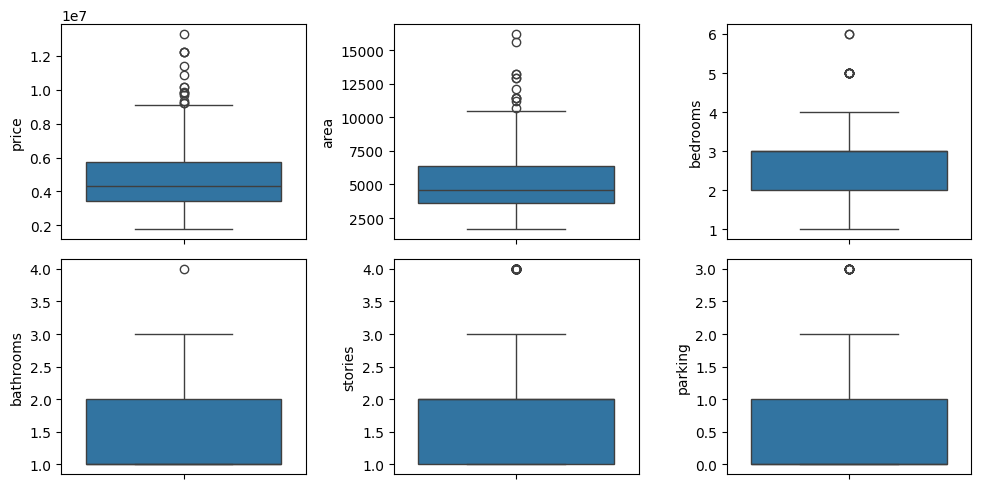

In [ ]:
# Analyzing outliers

fig, axs = plt.subplots(2,3, figsize = (10,5))
price_plot = sns.boxplot(data['price'], ax = axs[0,0])
area_plot = sns.boxplot(data['area'], ax = axs[0,1])
bedrooms_plot = sns.boxplot(data['bedrooms'], ax = axs[0,2])
bathrooms_plot = sns.boxplot(data['bathrooms'], ax = axs[1,0])
stories_plot = sns.boxplot(data['stories'], ax = axs[1,1])
parking_plot = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

# Output: It can be seen from the box plots that price and area have huge numbers of outliers. 


In [ ]:
print(len(data['price']))
print(len(data['area']))

# So, as we have enough data on price and area, we are going to drop the outliers 

545
545


In [ ]:
# The way we are going to drop the outliers is by treating them for both 
# price and area as following:

Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['price'] >= Q1 - (1.5 * IQR)) & (data['price'] <= Q3 + (1.5 * IQR))]

In [ ]:
# Same thing for area

Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)

IQR = Q3 - Q1

data = data[(data['area'] >= Q1 - (1.5 * IQR)) & (data['area'] <= Q3 + (1.5 * IQR))]

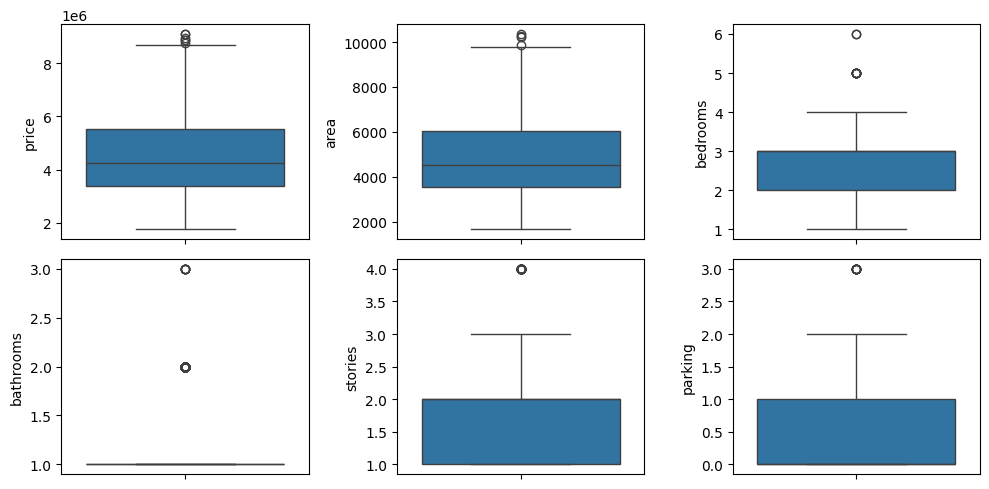

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
price_plot = sns.boxplot(data['price'], ax = axs[0,0])
area_plot = sns.boxplot(data['area'], ax = axs[0,1])
bedrooms_plot = sns.boxplot(data['bedrooms'], ax = axs[0,2])
bathrooms_plot = sns.boxplot(data['bathrooms'], ax = axs[1,0])
stories_plot = sns.boxplot(data['stories'], ax = axs[1,1])
parking_plot = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()


In [ ]:
# Now if we look at the box plot again, we don't see much outliers
# as we saw before which is exactly what we wanted

## 🔍 Feature Selection

Here we analyze which features correlate with the target variable and are worth keeping. This step improves model performance by reducing irrelevant data.


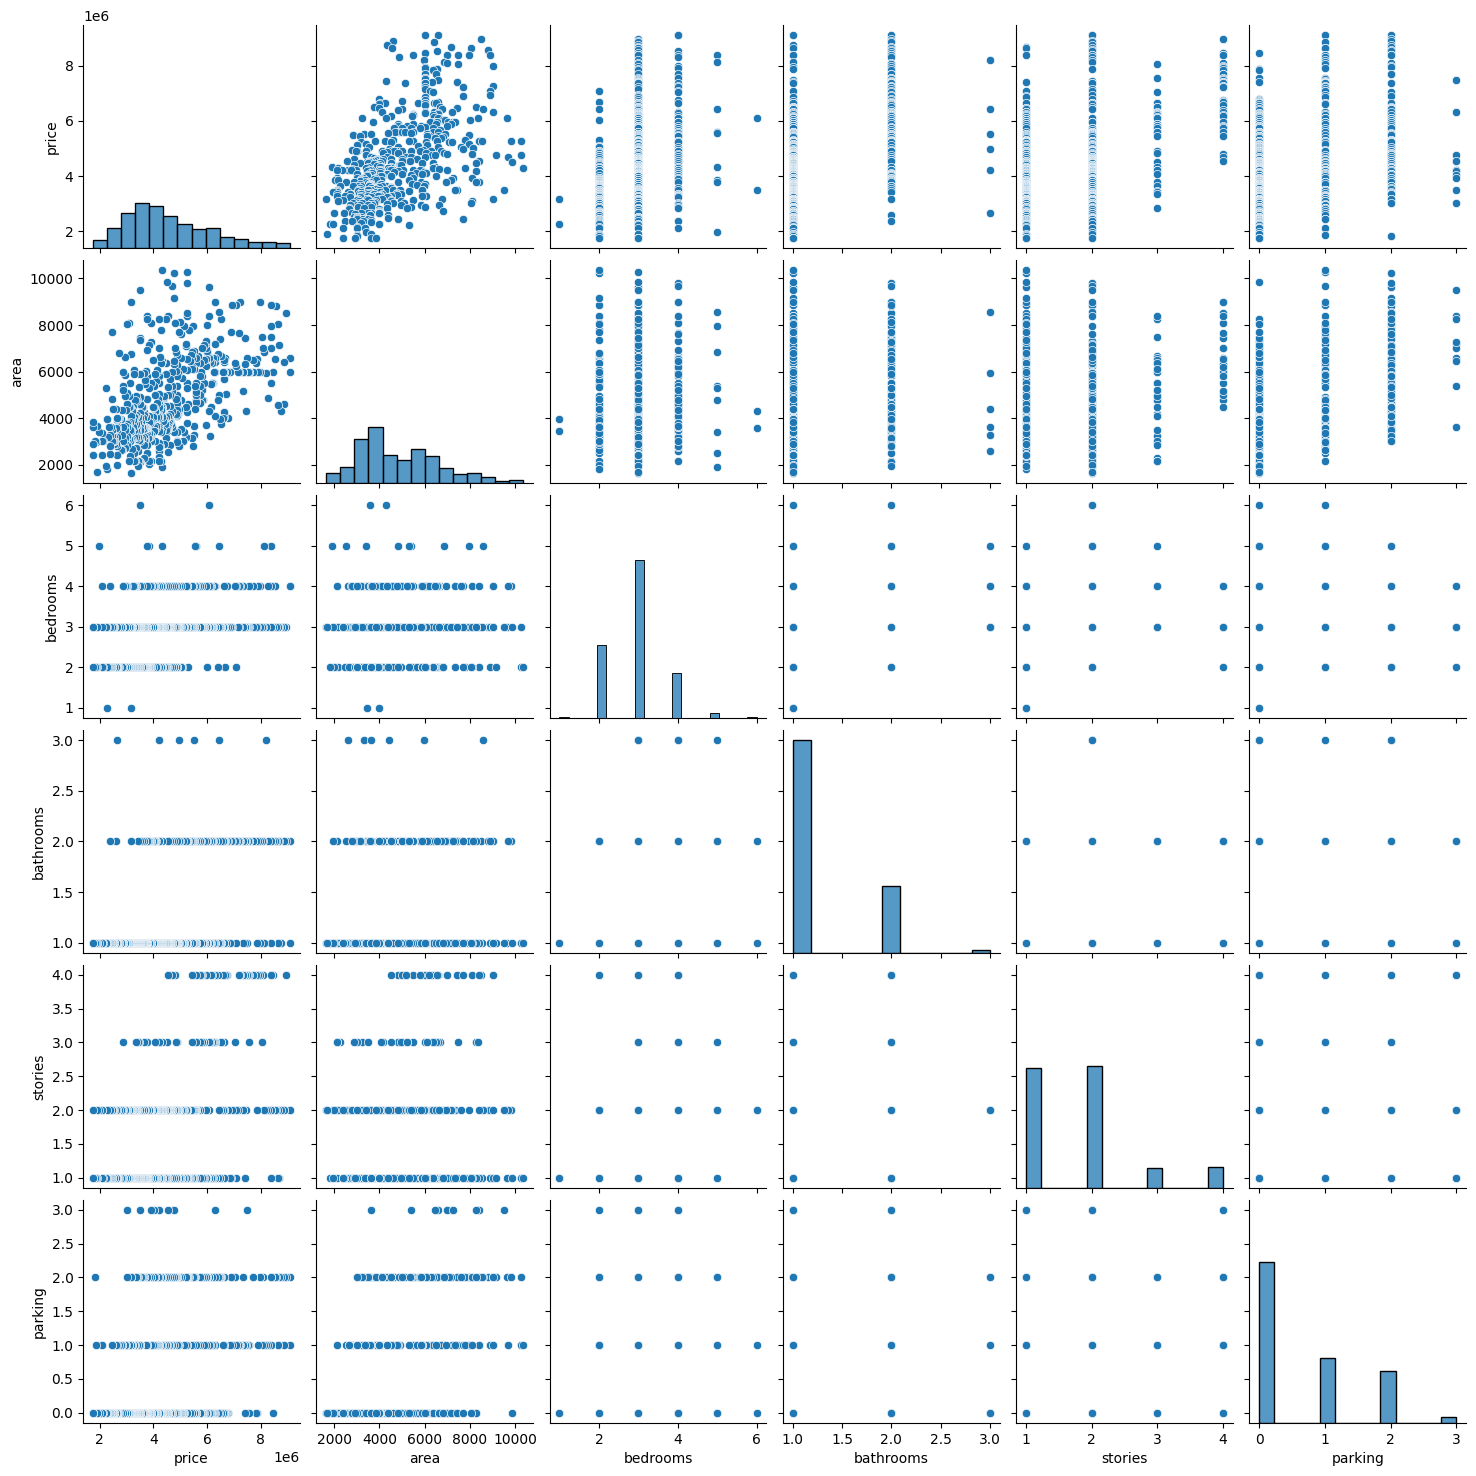

In [ ]:
sns.pairplot(data)
plt.show()

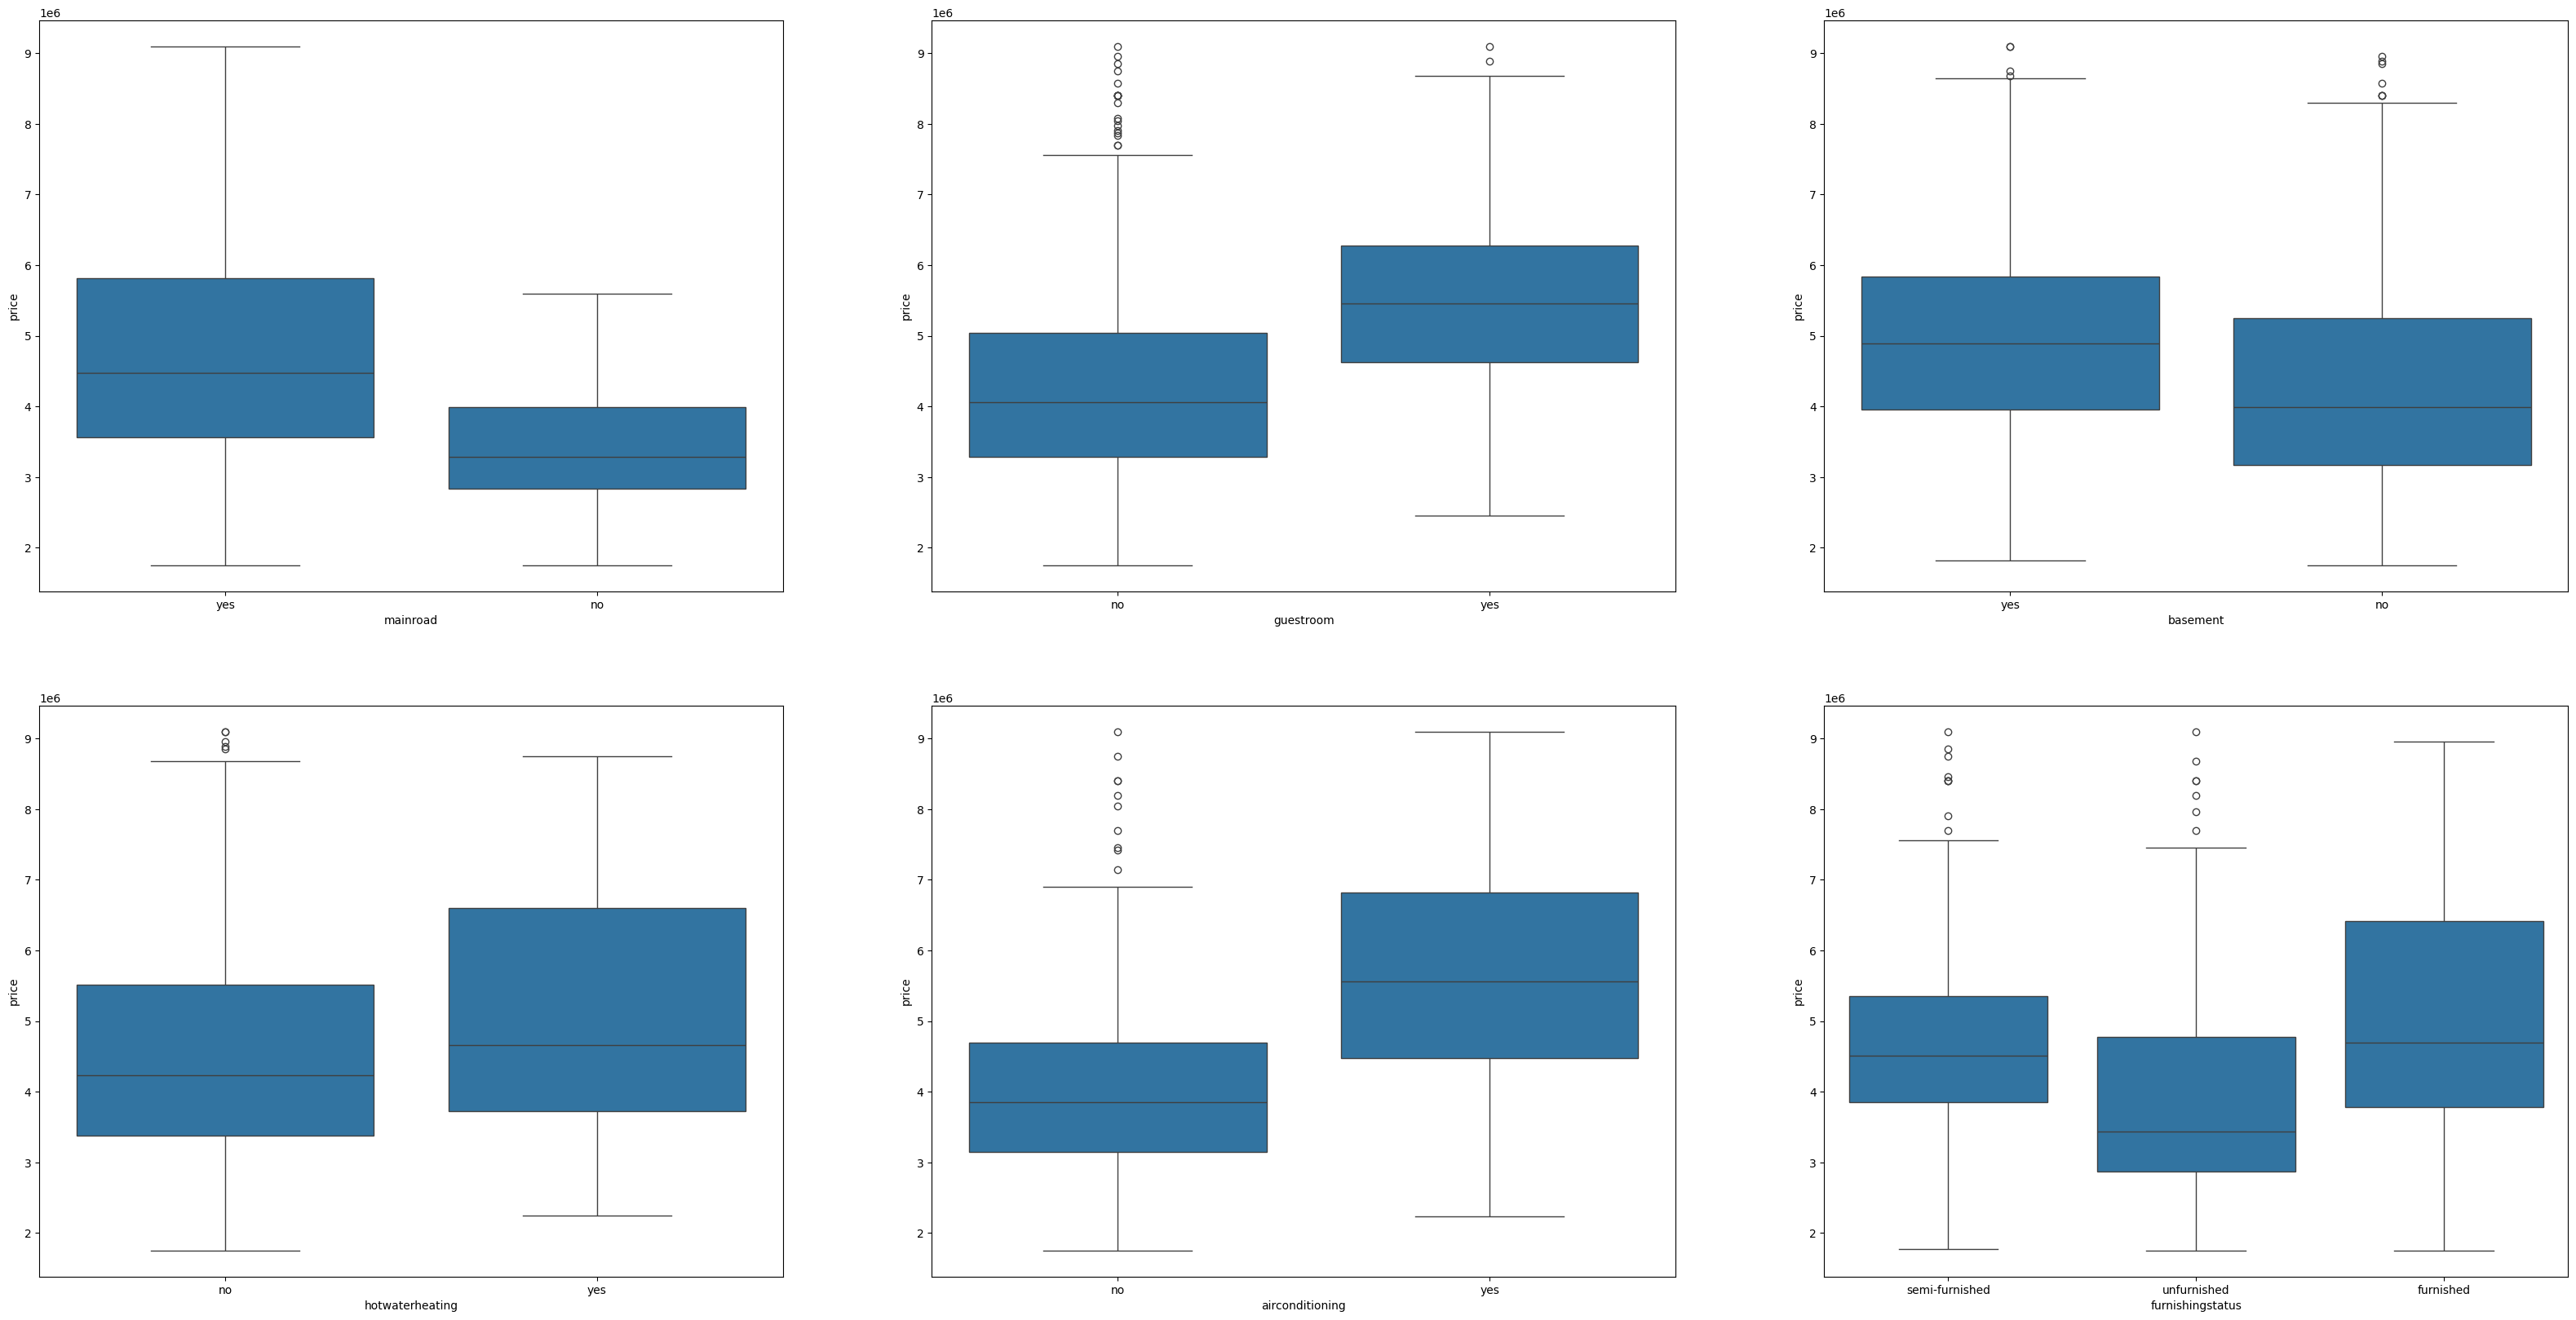

In [ ]:
plt.figure(figsize=(40,20))

# Plot for mainroad and price
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)

# Plot for guestroom and price
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)

# Plot for basement and price
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)

# Plot for hotwaterheating and price
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)

# Plot for airconditioning and price
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)

# Plot for furnishingstatus and price
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)

plt.show()



In [ ]:
featureList = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

data[featureList] = data[featureList].apply(lambda x: x.map({'yes': 1, "no": 0}))

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [ ]:
status = pd.get_dummies(data['furnishingstatus'], drop_first=True).astype(int)

In [ ]:
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


## 🤖 Model Training

We split the dataset into training and test sets, then train a linear regression model using Scikit-learn. This allows us to build a model that learns the relationship between features and the house price.


In [ ]:
data = pd.concat([data, status], axis = 1)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [ ]:
data.drop(['furnishingstatus'], axis = 1, inplace=True)

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [ ]:
scaler = MinMaxScaler()

vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data[vars] = scaler.fit_transform(data[vars])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,0
16,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,1
17,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0


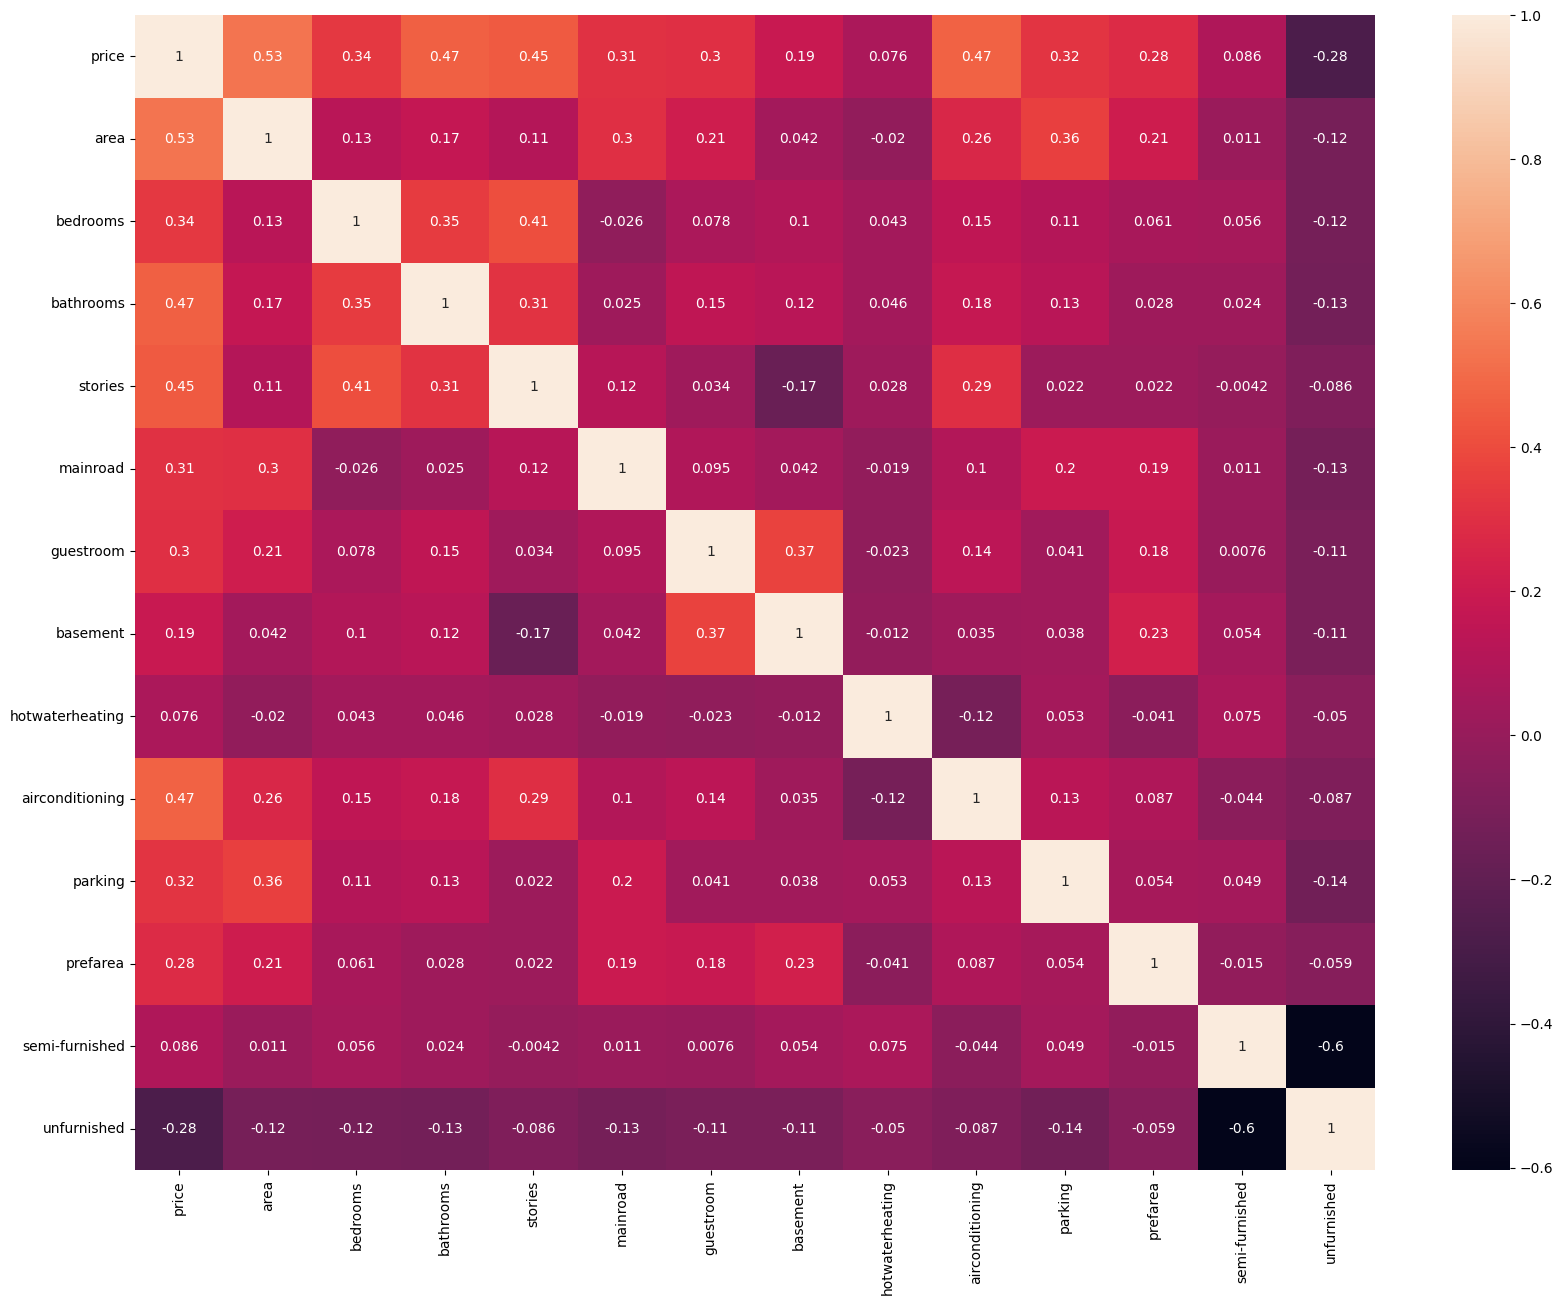

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
X = data.drop('price', axis=1)
y = data.pop('price')

## 📊 Model Evaluation

After training the model, we evaluate its performance on unseen data using metrics like R-squared and Mean Squared Error. A scatter plot shows how close predictions are to actual values.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [ ]:
y_pred = rfe.estimator_.predict(X_test_rfe)

In [ ]:
r2 = r2_score(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R-Squared: ", r2)

MSE:  0.023066895282879158
R-Squared:  0.5752528193186909


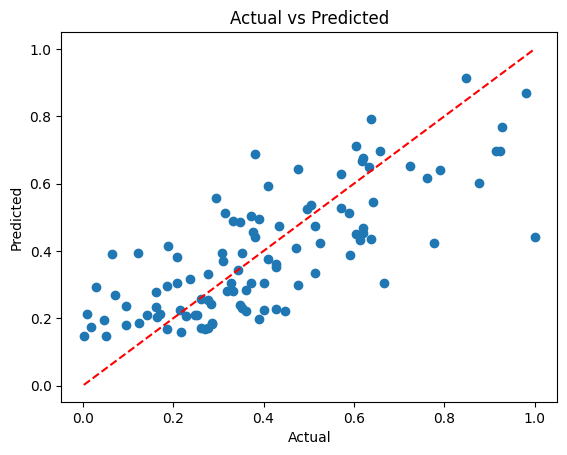

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()